# Regresión Logística
**Centro Turing**

En esta sección se introduce otro método supervisado: la clasificación. Introduciremos el clasificador más sencillo, el Regresor Logístico, que comparte los mismos fundamentos que el regresor lineal, pero se dirige a problemas de clasificación. Revisaremos los siguiente temas:
* Una definición formal y matemática del problema de clasificación, tanto para problemas binarios binario y multiclase
* Cómo evaluar el rendimiento de los clasificadores, es decir, sus métricas 
* La matemática detrás de la regresión logística
* El caso multiclase, con la regresión logística multiclase

## Definición de un problema de clasificación

Aunque el nombre de Regresión Logística sugiere una operación de regresión, el objetivo de Regresión Logística es la clasificación.

En el capítulo anterior, presentamos la regresión como la operación de estimar un valor continuo en una variable objetivo; matemáticamente hablando, la variable predicha es un número real en el rango (-∞, +∞). 



La clasificación, en cambio, predice una clase, es decir, un índice en un conjunto finito de clases. El caso más sencillo se denomina clasificación binaria, y la salida suele ser un valor booleano (verdadero/falso). 



Si la clase es verdadera, la muestra se suele denominarse muestra positiva; en caso contrario, es una muestra negativa.

Para exponer algunos ejemplos, he aquí algunas preguntas que se refieren a una clasificación binaria binaria:
* ¿Es este correo electrónico spam?
* ¿Vale mi casa al menos 200.000 dólares?
* ¿El usuario ha hecho clic en el banner/correo electrónico o lo ha abierto?
* ¿El documento actual es sobre finanzas?
* ¿Hay una persona en la imagen? ¿Es un hombre o una mujer?

Cuando la salida puede tener múltiples valores (es decir, la etiqueta predicha es una variable categórica), la clasificación se denomina multiclase.

Ejemplos de problemas de clasificación multiclase son:
* ¿Qué tipo de flor es ésta?
* ¿Cuál es el tema principal de esta página web?
* ¿Qué tipo de ataque de red estoy experimentando?
* ¿Qué dígito/letra se dibuja en la imagen?

## Formalización del problema: clasificación binaria

Empecemos ahora con el tipo de clasificación más sencillo: la clasificación binaria.


Formalmente, la observación genérica es un vector de características n-dimensional ($x_i$) emparejado con su etiqueta: la i-ésima genérica puede escribirse como:
$$(x_i, y_i): x_i\in R^n, y_i\in\{0,1\}$$

El modelo que subyace al clasificador es una función y se denomina función de clasificación, que puede ser lineal o no lineal. La forma de la función es la siguiente:

$$f: R^n \to \{0,1\}$$

Para tener una comprensión visual de lo que ocurre, consideremos ahora un problema de clasificación binaria binario, en el que cada característica tiene dos dimensiones (un problema bidimensional), utilizando el módulo [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html):

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep = 1.0, random_state=0)

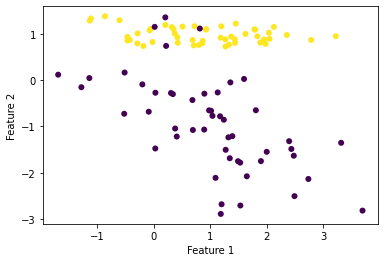

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            linewidth=0, edgecolor=None)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Evaluar el rendimiento del clasificador

Para saber si un clasificador es bueno, o lo que es lo mismo, para identificar el clasificador con el mejor rendimiento en la tarea de clasificación, necesitamos definir algunas métricas.

In [4]:
"""
Vamos a ilustrar la definición de las diferentes métricas con un ejemplo sencillo
"""

y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

Un falso positivo es una anomalía o un error en el resultado de una medición o cálculo dado en un modelo de clasificación binaria, indicando la presencia de una condición o característica cuando la misma no está presente en realidad. 

En cambio, un falso negativo es la ausencia de dicha condición o característica en el resultado de una medición o cálculo cuando en realidad sí que está presente. 

El contrario de un falso positivo es un verdadero positivo, y el de un falso negativo un verdadero negativo. 

In [5]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_orig, y_pred)
print(cm)

[[4 2]
 [1 3]]


In [6]:

tn, fp, fn, tp = cm.ravel()

resultados = """
Verdaderos negativos: {}
Falsos positivos: {}
Falsos negativos: {}
Verdaderos positivos: {}
""".format(tn, fp, fn, tp)

print(resultados)


Verdaderos negativos: 4
Falsos positivos: 2
Falsos negativos: 1
Verdaderos positivos: 3



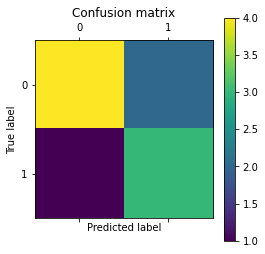

In [7]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Existen muchas métricas que son fáciles de definir matemáticamente. Sin embargo, para entender mejor su significado en ciencia de datos, consulta los siguientes artículos:
* [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
* [Precision, Recall, F1, Accuracy en clasificación](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)
* [Google, Machine Learning Crash Course: Classification](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)

In [8]:
"""
Definición y cálculo de la exactitud (accuracy)
"""
accuracy = (tn+tp)/np.sum(cm)
print(accuracy)

0.7


In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_orig, y_pred)

0.7

In [10]:
"""
Definición y cálculo de la precisión (precision)
"""
precision = tp/(tp+fp)
print(precision)

0.6


In [11]:
from sklearn.metrics import precision_score
precision_score(y_orig, y_pred)

0.6

In [12]:
"""
Definición y cálculo de la exhaustividad (recall)
"""
recall = tp/(tp+fn)
print(recall)

0.75


In [13]:
from sklearn.metrics import recall_score
recall_score(y_orig, y_pred)

0.75

In [14]:
"""
Definición y cálculo del valor f1 (f1-score)
"""
f1 = 2*(precision*recall)/(precision+recall)
print(f1)

0.6666666666666665


In [15]:
from sklearn.metrics import f1_score
f1_score(y_orig, y_pred)

0.6666666666666665

En conclusión, si hay tantas puntuaciones de error, ¿cuál es la mejor para usar? La solución es no es muy fácil, y a menudo es mejor tener y evaluar el clasificador en todos ellos. Scikit-learn viene a ayudarnos aquí, proporcionando un método para calcular todas estas puntuaciones para cada clase:

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_orig, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## Definición de un enfoque basado en la probabilidad

Introduzcamos gradualmente cómo funciona la regresión logística. Hemos dicho que es un clasificador, pero su nombre recuerda a un regresor. El elemento que necesitamos para unir las piezas es la interpretación probabilística. 

Modelaremos la respuesta como una variable aleatoria $Y$, con un espacio de estados $\{y_1,...,y_n\}$. Dado un vector de variables predictoras $x$, el objetivo es encontrar el estado $y^*$ que maximice la probabilidad $P(Y=y^*|x)$.

Intentemos ahora ajustar un regresor lineal múltiple en un problema de clasificación ficticia, utilizando una interpretación probabilística. 

Reutilizamos el mismo conjunto de datos que creamos anteriormente en este capítulo, pero primero dividimos el conjunto de datos en conjuntos de entrenamiento y de prueba, y convertimos el vector y en valores decimales:

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y.astype(float),
    test_size=0.33, random_state=101)
print(y_test)

[1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 1.]


In [18]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
y_regr = regr.predict(X_test)
print(y_regr)

[ 0.82842185  0.51658599 -0.24401399  0.77146779  0.808542    0.94872224
  0.37298329  0.74570887  0.10601523  1.01249253  0.07114471  0.67290568
  0.99195015  0.21141514  0.04820697  0.77430681  0.75355411  0.08874438
  0.84335375  0.94186451  0.81684114  0.24892468  0.25725028 -0.45228503
  0.99151599  0.65270733  0.85156817  0.89076816 -0.55967141  0.11480037
  0.41003575 -0.10808423  0.79492384]


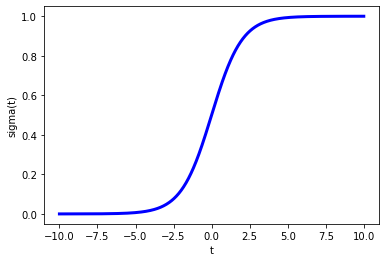

In [19]:
import numpy as np
def model(x):
    return 1 / (1 + np.exp(-x))

X_vals = np.linspace(-10, 10, 1000)
plt.plot(X_vals, model(X_vals), color='blue', linewidth=3)
plt.ylabel('sigma(t)')
plt.xlabel('t')
plt.show()

In [20]:
y_prob = model(y_regr)
print(np.round(y_prob, 2))

[0.7  0.63 0.44 0.68 0.69 0.72 0.59 0.68 0.53 0.73 0.52 0.66 0.73 0.55
 0.51 0.68 0.68 0.52 0.7  0.72 0.69 0.56 0.56 0.39 0.73 0.66 0.7  0.71
 0.36 0.53 0.6  0.47 0.69]


In [21]:
y_pred = (y_prob>=0.5).astype(int)
print(y_pred)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40        16
         1.0       0.59      1.00      0.74        17

    accuracy                           0.64        33
   macro avg       0.79      0.62      0.57        33
weighted avg       0.79      0.64      0.57        33



In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.94      1.00      0.97        17

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



La regresión logística es un algoritmo muy popular por lo siguiente
* Es lineal: es el equivalente a la regresión lineal para la clasificación.
* Es muy sencillo de entender, y la salida puede ser la clase más probable, o la probabilidad de pertenencia.
* Es sencillo de entrenar: tiene muy pocos coeficientes (un coeficiente por cada característica, más un sesgo). Esto hace que el modelo sea muy pequeño de almacenar (sólo se necesita almacenar un vector de pesos).
* Es eficiente desde el punto de vista computacional: puede puede ser entrenado muy rápidamente.
* Tiene una extensión para la clasificación multiclase.



Por desgracia, no es un clasificador perfecto y tiene algunos inconvenientes:
* A menudo no es muy eficaz, en comparación con los algoritmos más avanzados, porque tiende a no ajustarse (no hay flexibilidad: el límite tiene que ser una línea o un hiperplano)
* Es lineal: si el problema no es lineal, no hay forma de ajustar correctamente este clasificador en el conjunto de datos

## Regresión logística multiclase

La extensión de la Regresión Logística, para clasificar más de dos clases, es la Regresión Logística Multiclase. El algoritmo base se denomina One-vs-rest, o One-vs-all, y es sencillo de entender y aplicar.

Para hacer la predicción final, sólo tenemos que seleccionar el clasificador que haya emitido la mayor probabilidad. Por ejemplo, habiendo entrenado tres clasificadores, el espacio de características no se divide en dos subplanos, sino según el límite de decisión de los tres clasificadores.

De hecho, el enfoque de "uno contra todos" es muy conveniente:
* El número de clasificadores a ajustar es exactamente el mismo que el número de clases.
* Por lo tanto, el modelo estará compuesto por N (donde N es el número de clases) vectores de peso.
* Además, esta operación es paralela y el entrenamiento de los N clasificadores puede realizarse simultáneamente, utilizando múltiples hilos (hasta N hilos).

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=2,
                           n_classes=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep = 1.0, random_state=101)

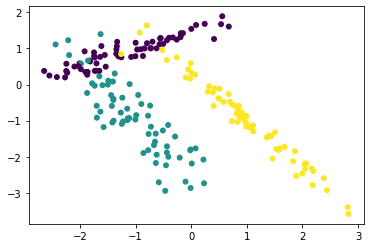

In [25]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, linewidth=0, edgecolor=None)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(float),
                                                    test_size=0.33, random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

In [28]:
print(clf.predict_proba(X_test[0].reshape(1,-1)))
print(y_test[0])
print(y_clf[0])

[[0.34624735 0.64703258 0.00672007]]
0.0
1


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_clf))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85        24
         1.0       0.87      0.91      0.89        22
         2.0       0.95      0.95      0.95        20

    accuracy                           0.89        66
   macro avg       0.90      0.90      0.90        66
weighted avg       0.89      0.89      0.89        66



Ahora, le mostraremos cómo utilizar diferentes bibliotecas, y diferentes módulos, para realizar la tarea de clasificación, utilizando la regresión logística. No nos centraremos aquí en cómo medir el rendimiento, sino en cómo los coeficientes pueden componer el modelo.

In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
X, y = make_classification(n_samples=10000, n_features=10,
                           n_informative=10, n_redundant=0,
                           random_state=101)

In [32]:
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


In [33]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.3671
Time:                        19:49:41   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4299      0.039     11.023      0.000       0.353       0.506
x1             0.0671      0.015      4.410      0.000       0.037       0.097
x2            -0.7828      0.019    -41.947      0.000      -0.819      -0.746
x3             0.1221      0.016      7.815      0.000       0.091       0.153
x4             0.2841      0.016     18.150      0.000       0.253       0.315
x5             0.1469      0.014     10.283      0.000       0.119       0.175
x6            -0.3414      0.019    -17.636      0.000      -0.379      -0.303
x7             0.0503      0.014      3.481      0.000       0.022       0.079
x8            -0.1393      0.014     -9.642      0.000      -0.168      -0.111
x9             0.1127      0.014      7.931      0.000       0.085       0.141
x10           -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

In [34]:
import pandas as pd
Xd = pd.DataFrame(X)
Xd.columns = ['VAR'+str(i+1) for i in range(10)]
Xd['response'] = y
logistic_regression = smf.logit(formula =
'response ~ VAR1+ VAR2 + VAR3 + VAR4 + \
VAR5 + VAR6 + VAR7 + VAR8 + VAR9 + VAR10', data=Xd)
fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.438685
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               response   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                  0.3671
Time:                        19:49:41   Log-Likelihood:                -4386.8
converged:                       True   LL-Null:                       -6931.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4299      0.039     11.023      0.000       0.353       0.506
VAR1           0.0671      0.015      4.410      0.000       0.037       0.097
VAR2          -0.7828      0.019    -41.947      0.000      -0.819      -0.746
VAR3           0.1221      0.016      7.815      0.000       0.091       0.153
VAR4           0.2841      0.016     18.150      0.000       0.253       0.315
VAR5           0.1469      0.014     10.283      0.000       0.119       0.175
VAR6          -0.3414      0.019    -17.636      0.000      -0.379      -0.303
VAR7           0.0503      0.014      3.481      0.000       0.022       0.079
VAR8          -0.1393      0.014     -9.642      0.000      -0.168      -0.111
VAR9           0.1127      0.014      7.931      0.000       0.085       0.141
VAR10         -0.4792      0.018    -27.340      0.000      -0.514      -0.445
==============================================================================
"""

Por último, pasamos a la biblioteca Scikit-learn, y a su implementación de la Regresión Logística Regresión Logística. Scikit-learn tiene dos implementaciones: una basada en la solución clásica de la optimización de la regresión logística, y la otra basada en una implementación rápida de SGD. Exploraremos ambas.

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1E4, tol=1E-25, random_state=101)
clf.fit(X,y)

LogisticRegression(C=10000.0, random_state=101, tol=1e-25)

In [36]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
print(np.round(coeffs,4))

[ 0.4299  0.0671 -0.7828  0.1221  0.2841  0.1469 -0.3414  0.0503 -0.1393
  0.1127 -0.4792]


Como último modelo, probamos la implementación Scikit-learn del método de optimización SGD (Stochastic Gradient Descent).

In [37]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', alpha=1E-4, max_iter=1E2, random_state=101)
clf.fit(X,y)

SGDClassifier(loss='log', max_iter=100.0, random_state=101)

In [38]:
coeffs = [clf.intercept_[0]]
coeffs.extend(clf.coef_[0])
print(np.round(coeffs,4))

[ 0.5069  0.0705 -0.8884  0.0352  0.3366  0.2555 -0.4676  0.1485 -0.2201
  0.146  -0.4688]


## Resumen

Hemos visto en este capítulo cómo construir un clasificador binario basado en la Regresión Lineal y la función logística. Es rápido, pequeño y muy efectivo, y puede ser entrenado usando una técnica incremental basada en el SGD. Además, con muy poco esfuerzo (el enfoque One-vs-Rest ), el regresor logístico binario puede convertirse en multiclase.